# Y & Y ML Project 

In [832]:
import re
import bs4
import requests
from bs4 import BeautifulSoup
import pandas as pd
import scipy as sc
import numpy as np
import time
import csv

In [833]:
#List of all the games categories:
dic_categories = ["action", "hack_and_slash", "shmup", "rpg", "strategy",
                  "tower_defense", "adventure", "casual", "hidden_object",
                    "metroidvania", "story_rich", "visual_novel",
                    "simulation", "sports", "racing"]

#Extract all links of games of one category.
def links_games_extraction(category):
    url = "https://store.steampowered.com/contenthub/querypaginated/tags/ConcurrentUsers/render/"
    params = {
        "query": "",
        "start": 0,
        "count": 15,
        "cc": "US",
        "l": "english",
        "v": "4",
        "tag": category,
        "tagid": "19",
    }
    links_list = []
    for page in range(2000):  # <-- increase number of pages here
        params["start"] = page
        data = requests.get(url, params=params).json()
        soup = BeautifulSoup(data["results_html"], "html.parser")
        link_to_game = soup.find_all('a', class_="tab_item")
        try:
            links_list.append(link_to_game[0]["href"])
        except IndexError:
            break
    return links_list

links_list_outside = []
links_list_inside = []

In [834]:
#Creating lists of all the relevant features.
general_list_names = []
general_list_genres_by_site = []
general_list_languages = []
general_list_release_date = []
general_list_developer = []
general_list_price = []
general_list_tags = []
general_list_content_description = []
general_list_reviwes_all = []
general_list_reviwes_positive = []
general_list_reviwes_nagitive = []
general_list_achievments_game_link = []
general_list_achievments_game_names = []
general_list_achievments_game_ranks = []
general_list_achievments_game_link = []
general_list_achievments_num = []
general_list_achievments_names = []
general_list_achievments_grades = []

#Extracting the HTML file of each game.
def get_html_content(url):
    if url == None or url == "":
        return 0
    else:
        response = requests.get(url)
        res = response.content
        soup_obj = BeautifulSoup(res, 'html.parser')
        # returns the html text-content of the page
        return soup_obj
    
#Extracting achievments' game link
def achievment_link(html):
    global general_list_achievments_num
    global general_list_achievments_game_names
    global general_list_achievments_grades
    achievments_game_link = html.find('a', class_='communitylink_achievement communitylink_achivement_plusmore')
    achievments_game_link2 = achievments_game_link["href"]
    if achievments_game_link == None:
        general_list_achievments_num.append(None)
        general_list_achievments_names.append(None)
        general_list_achievments_grades.append(None)
        print("general_list_achievments_1")
        return None
    else:
        return achievments_game_link2

# Scraping the Achivment data of each game
def achievment_data(achievments_game_link):
    # achievments' game link:
    
    global general_list_achievments_num
    global general_list_achievments_game_names
    global general_list_achievments_grades
    
    html = requests.get(achievments_game_link)
    html_page = BeautifulSoup(html.content, 'html.parser')
    
    ####
    #Number of Achievments:
    if (html_page.find('span', class_ = 'wt')) == None:
        general_list_achievments_num.append(None)
        general_list_achievments_names.append(None)
        general_list_achievments_grades.append(None)
        print("general_list_achievments_2")
        return None
    achievments_num = int(html_page.find('span', class_ = 'wt').get_text())
    general_list_achievments_num.append(achievments_num)
    
    #list of achiements values (grades):
    achievments_game_percents = []
    achievments_percents = html_page.findAll('div', class_ = 'achievePercent')
    for achievment_percent in achievments_percents:
        achievments_game_percents.append(float(achievment_percent.get_text().strip('%')))
    achievments_game_avg = sum(achievments_game_percents) / len(achievments_game_percents)
    general_list_achievments_grades.append(achievments_game_avg)
    
#Scraping all the relevant information of each game.
def scrap_data(category):
    global general_list_names
    global general_list_genres_by_site
    global general_list_languages
    global general_list_release_date
    global general_list_developer
    global general_list_price
    global general_list_tags
    global general_list_content_description
    global general_list_reviwes_all
    global general_list_reviwes_positive
    global general_list_reviwes_nagitive
    global general_list_achievments_num
    global general_list_achievments_names
    global general_list_achievments_grades
    
    #condition to check if page does not exist
    basic_info = category.find(class_='glance_ctn')
    release_date = basic_info.find(class_='release_date')
    if release_date == None:
        print("None!")
        return 0
        
    #category = BeautifulSoup(url.content, 'html.parser')
    # 1 name
    name = category.find(id='appHubAppName').text
    general_list_names.append(name)

    # 2 genres defined by site:
    genres_by_site = soup_obj.find('div', class_='details_block')
    genres_by_site2 = genres_by_site.find_all('a')
    genres_by_site_to_list = []
    for genres_by_site3 in genres_by_site2:
        genres_by_site_to_list.append(genres_by_site3.get_text())
    general_list_genres_by_site.append(genres_by_site_to_list)

    # 3 Scraping languages of each game
    lang_table = soup_obj.find(id='languageTable')
    lang_names2 = lang_table.findAll('td', class_="ellipsis")
    lang_to_list = []
    for lang_names3 in lang_names2:
        cleaned_lang = lang_names3.text.strip().replace('\t', '')
        lang_to_list.append(cleaned_lang)
    general_list_languages.append(lang_to_list)

    # 4 release_date
    basic_info = category.find(class_='glance_ctn')
    release_date = basic_info.find(class_='release_date')
    date = release_date.find(class_='date')
    general_list_release_date.append(date)

    # 5 developer's name:
    developer_info = basic_info.find('div', class_='dev_row')
    if developer_info != None:
        dev_name = developer_info.find('a').text
        general_list_developer.append(dev_name)
    else:
        general_list_developer.append(None)

    # 6 tags for this product:
    user_define_tags2 = soup_obj.findAll('div', class_='glance_tags popular_tags')
    for user_define_tags3 in user_define_tags2:
        user_define_tags4 = user_define_tags3.text.strip().replace('\t', '')
        tags_list = user_define_tags4.split('\r\n')
        tags_to_be_list = []
        for tag in tags_list:
            tags_to_be_list.append(tag.strip())
        general_list_tags.append(tags_to_be_list)
        
    # reviews:
    reviews = category.find('div', class_='user_reviews_filter_menu_flyout_content')
    positive = reviews.findAll('span', class_='user_reviews_count')

    # 8 all reviews:
    all_reiviews = int((positive[0].get_text()).replace('(', '').replace(')', '').replace(',', ''))
    general_list_reviwes_all.append(all_reiviews)
    
    # 9 positive reviews:
    positive_reiviews = int((positive[1].get_text()).replace('(', '').replace(')', '').replace(',', ''))
    general_list_reviwes_positive.append(positive_reiviews)
    
    # 10 positive reviews:
    negative_reiviews = int((positive[2].get_text()).replace('(', '').replace(')', '').replace(',', ''))
    general_list_reviwes_nagitive.append(negative_reiviews)
    
    # 11 CONTENT DESCRIPTION:
    content_description2 = category.find('div', id='game_area_content_descriptors')
    if content_description2 != None:
        content_description = content_description2.find('i').text
        #content_description = re.search("w\+",content_description_suorce)
    else:
        content_description = None
    general_list_content_description.append(content_description)
    
    if (category.find('a', class_='communitylink_achievement communitylink_achivement_plusmore')) != None:
        #finding the achiements' link:
        achievments_game_link = achievment_link(category)

        #finding the achiements' values:
        achievment_data(achievments_game_link)
    else:
        general_list_achievments_num.append(None)
        general_list_achievments_names.append(None)
        general_list_achievments_grades.append(None)


In [835]:
#List of all the categories.
dic_categories = ["action", "hack_and_slash", "shmup", "rpg", "strategy",
                  "tower_defense", "adventure", "casual", "hidden_object",
                    "metroidvania", "story_rich", "visual_novel",
                    "simulation", "sports", "racing"]


#####################
#  The big loop itself:
####################

In [836]:
#####################
#The big loop itself:
####################
for cat in dic_categories:
    links_list_inside = links_games_extraction(cat)
    for link in links_list_inside:
        print(link)
        soup_obj = get_html_content(link)
        scrap_data(soup_obj)

KeyboardInterrupt: 

In [ ]:
#Creating Data Frame from all the lists.
list_to_df = {'Game_names': general_list_names, 'Genres_by_site': general_list_genres_by_site,
              'Game_developer': general_list_developer, 'Game_tags': general_list_tags,
             'Game_languages': general_list_languages, 'Game_content_description': general_list_content_description,
                'Game__release_date': general_list_release_date, 'Game_reviwes_all': general_list_reviwes_all,
             'Game_reviwes_positive': general_list_reviwes_positive, 'Game_reviwes_nagitive': general_list_reviwes_nagitive,
              'Game_achievments_num': general_list_achievments_num,
              'Game_achievments_grades': general_list_achievments_grades
             }

In [ ]:
#Checking the lenght of all the lists.  
print("general_list_names: ", len(general_list_names))
print("general_list_genres_by_site: ", len(general_list_genres_by_site))
print("general_list_developer: ", len(general_list_developer))
print("general_list_tags: ", len(general_list_tags))
print("general_list_languages: ", len(general_list_languages))
print("general_list_content_description: ", len(general_list_content_description))
print("general_list_reviwes_all: ", len(general_list_reviwes_all))
print("general_list_reviwes_positive: ", len(general_list_reviwes_positive))
print("general_list_reviwes_nagitive: ", len(general_list_reviwes_nagitive))  
print("general_list_achievments_num: ", len(general_list_achievments_num))
print("general_list_achievments_grades: ", len(general_list_achievments_grades))

In [ ]:
df = pd.DataFrame(list_to_df)
df.shape

In [ ]:
df.to_csv('./games_dataset_final.csv', index=False)

# End of crawling!!!

#  Data Handling part

In [837]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import ast
import re
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import datetime
from datetime import date
from datetime import datetime, date


In [838]:
df = pd.read_csv('games_dataset_final.csv')
df_copy = df.copy()

In [839]:
df_copy.shape

(11122, 12)

Functions for data cleaning

In [840]:
def convert_string_to_list(df, col_name):
    df[col_name] = df[col_name].apply(ast.literal_eval)

In [841]:
def clean_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

In [842]:
def calculate_days(date_str):
    date_format = '%d %b, %Y'  # Updated date format in the column
    target_date = date(2023, 6, 25)  # Desired date to calculate days until

    # Handle the case where the day is missing
    if len(date_str.split()) == 2:
        date_str += ' 1'
        date_format = '%b %Y %d'

    date_obj = datetime.strptime(date_str, date_format).date()
    days_difference = (target_date - date_obj).days
    return days_difference

Filling NA with zero or empty string.

In [843]:
df_copy['Game_achievments_num'].fillna(0, inplace=True) # filling Nan with 0
df_copy['Game_achievments_grades'].fillna(0, inplace=True) # filling Nan with 0
df_copy['Game_content_description'].fillna("", inplace=True) # filling Nan with 0
#df_copy['Game_achievments_grades'].fillna(0, inplace=True)
df_copy.shape

(11122, 12)

In [844]:
df_copy.shape

(11122, 12)

In [845]:
df_copy.isnull().sum()

Game_names                  0
Genres_by_site              0
Game_developer              1
Game_tags                   0
Game_languages              0
Game_content_description    0
Game__release_date          0
Game_reviwes_all            0
Game_reviwes_positive       0
Game_reviwes_nagitive       0
Game_achievments_num        0
Game_achievments_grades     0
dtype: int64

Fixing some of the columns that apears as one big string

In [846]:
convert_string_to_list(df_copy, 'Genres_by_site')
convert_string_to_list(df_copy, 'Game_languages')
#convert_string_to_list(df_copy, 'Game_achievments_names')
#convert_string_to_list(df_copy, 'Game_achievments_grades')

Cheacking for success.

In [847]:
gn = df_copy.iloc[0,1]
print(gn[1])
df_copy.shape

Indie


(11122, 12)

Counting the number of offensive words in every game description.

In [848]:
# Define the offensive words
offensive_words = ['blood', 'violence', 'alcohol', 'strong language', 'sexual', 'nudity']

# Create a regex pattern to match the offensive words
pattern = re.compile(r'\b(?:' + '|'.join(offensive_words) + r')\b', flags=re.IGNORECASE)

# Create a new column "Offensive_word_count" with the count of offensive words
df_copy['Offensive_word_count'] = df_copy['Game_content_description'].apply(
    lambda x: len(set(re.findall(pattern, str(x)))) if pd.notnull(x) else 0
)

In [849]:
df_copy['Num_of_game_languages'] = df_copy['Game_languages'].apply(lambda x: len(x))
df_copy['Num_of_genres_by_site'] = df_copy['Genres_by_site'].apply(lambda x: len(x))
df_copy.shape

(11122, 15)

In [850]:
df_copy.shape

(11122, 15)

Checking for duplicated & delete them.

In [851]:
df_copy['Game_names'].duplicated().sum()

6494

In [852]:
df_copy.drop_duplicates(subset='Game_names', inplace=True)
df_copy.shape

(4628, 15)

Adding new columns and defining them.

In [853]:
df_copy['Game_release_date_cleaned'] = df_copy['Game__release_date'].apply(clean_html_tags)

#Adding the percentage of positive review.
df_copy['Game_reviwes_positive_percentage'] = (df_copy['Game_reviwes_positive'] / df_copy['Game_reviwes_all']) * 100

#Adding the 'Successful_Game' column.
df_copy['successful_game'] = ((df_copy['Game_reviwes_positive_percentage'] > 80) & (df_copy['Game_reviwes_all'] > 200000)).astype(int)

df_copy['days_until_scraping_day'] = df_copy['Game_release_date_cleaned'].apply(calculate_days)

df_copy['reviwes_positive_per_day'] = df_copy['Game_reviwes_positive'] / df_copy['days_until_scraping_day']

df_copy['reviwes_all_per_day'] = df_copy['Game_reviwes_all'] / df_copy['days_until_scraping_day']

In [854]:
#Option to remove outliers.
#more than 4000 reviwes per day and less than 50 - remove
df_copy = df_copy[(df_copy['reviwes_all_per_day'] <= 4000) & (df_copy['reviwes_all_per_day'] >= 30)]

#in order to drop ocunter strike
df_copy = df_copy[(df_copy['Game_reviwes_all'] <= 900000)]

In [893]:
df_copy['reviwes_all_per_day'].describe()

count    463.000000
mean       0.749187
std        2.477892
min       -0.378462
25%       -0.230580
50%        0.000000
75%        0.769420
max       27.283283
Name: reviwes_all_per_day, dtype: float64

In [855]:
df_copy.shape

(514, 21)

Code for deleting outliers

In [856]:
outliers_to_drop = df_copy[(df_copy['Game_reviwes_all'] > 800000)].index
outliers_to_drop
outliers_to_drop2 = df_copy[(df_copy['Game_reviwes_all'] < 3000)].index
outliers_to_drop2
df_copy.drop(index=outliers_to_drop, inplace=True)
df_copy.drop(index=outliers_to_drop2, inplace=True)
df_copy.shape

(463, 21)

In [857]:
df_copy.columns

Index(['Game_names', 'Genres_by_site', 'Game_developer', 'Game_tags',
       'Game_languages', 'Game_content_description', 'Game__release_date',
       'Game_reviwes_all', 'Game_reviwes_positive', 'Game_reviwes_nagitive',
       'Game_achievments_num', 'Game_achievments_grades',
       'Offensive_word_count', 'Num_of_game_languages',
       'Num_of_genres_by_site', 'Game_release_date_cleaned',
       'Game_reviwes_positive_percentage', 'successful_game',
       'days_until_scraping_day', 'reviwes_positive_per_day',
       'reviwes_all_per_day'],
      dtype='object')

In [858]:
df_copy.isnull().sum()


Game_names                          0
Genres_by_site                      0
Game_developer                      0
Game_tags                           0
Game_languages                      0
Game_content_description            0
Game__release_date                  0
Game_reviwes_all                    0
Game_reviwes_positive               0
Game_reviwes_nagitive               0
Game_achievments_num                0
Game_achievments_grades             0
Offensive_word_count                0
Num_of_game_languages               0
Num_of_genres_by_site               0
Game_release_date_cleaned           0
Game_reviwes_positive_percentage    0
successful_game                     0
days_until_scraping_day             0
reviwes_positive_per_day            0
reviwes_all_per_day                 0
dtype: int64

Scaling the relevant data

More cleaning... Removing unneccessery columns for the ML

In [859]:
cols_to_drop = ["Game_developer", "Game_tags", "Game_content_description",
                "Game__release_date"  ]
df_copy = df_copy.drop(cols_to_drop, axis = 1)
df_copy.shape

(463, 17)

In [860]:
df_copy.columns

Index(['Game_names', 'Genres_by_site', 'Game_languages', 'Game_reviwes_all',
       'Game_reviwes_positive', 'Game_reviwes_nagitive',
       'Game_achievments_num', 'Game_achievments_grades',
       'Offensive_word_count', 'Num_of_game_languages',
       'Num_of_genres_by_site', 'Game_release_date_cleaned',
       'Game_reviwes_positive_percentage', 'successful_game',
       'days_until_scraping_day', 'reviwes_positive_per_day',
       'reviwes_all_per_day'],
      dtype='object')

In [861]:
df_copy.head()

,Game_names,Genres_by_site,Game_languages,Game_reviwes_all,Game_reviwes_positive,Game_reviwes_nagitive,Game_achievments_num,Game_achievments_grades,Offensive_word_count,Num_of_game_languages,Num_of_genres_by_site,Game_release_date_cleaned,Game_reviwes_positive_percentage,successful_game,days_until_scraping_day,reviwes_positive_per_day,reviwes_all_per_day
0,Geometry Dash,"[Action, Indie, RobTop Games, RobTop Games]",[English],242789,226694,16095,120.0,32.316667,0,1,4,"22 Dec, 2014",93.370787,1,3107,72.962343,78.142581
3,Call of Duty®: Modern Warfare® II,"[Action, Infinity Ward, Raven Software, Beenox...","[English, French, Italian, German, Spanish - S...",389880,235282,154598,24.0,2.062500,1,14,14,"27 Oct, 2022",60.347286,0,241,976.273859,1617.759336
4,Apex Legends™,"[Action, Adventure, Free to Play, Respawn Ente...","[English, French, Italian, German, Spanish - S...",672267,546717,125550,12.0,31.791667,0,14,6,"4 Nov, 2020",81.324385,1,963,567.722741,698.096573
8,BattleBit Remastered,"[Action, Massively Multiplayer, Early Access, ...","[English, French, Italian, German, Spanish - S...",23267,21023,2244,0.0,0.000000,0,27,7,"15 Jun, 2023",90.355439,0,10,2102.300000,2326.700000
9,War Thunder,"[Action, Free to Play, Massively Multiplayer, ...","[English, German, French, Italian, Spanish - S...",531030,300529,230501,75.0,7.113333,0,18,6,"15 Aug, 2013",56.593601,0,3601,83.457095,147.467370



# UNTIL HERE DATA HANDLING.


# Let's start with the graphs...

In [862]:
df_copy.corr()

,Game_reviwes_all,Game_reviwes_positive,Game_reviwes_nagitive,Game_achievments_num,Game_achievments_grades,Offensive_word_count,Num_of_game_languages,Num_of_genres_by_site,Game_reviwes_positive_percentage,successful_game,days_until_scraping_day,reviwes_positive_per_day,reviwes_all_per_day
Game_reviwes_all,1.000000,0.989663,0.655372,0.234915,-0.045471,0.104718,0.169141,-0.014991,0.128048,0.735275,0.574879,0.323425,0.320011
Game_reviwes_positive,0.989663,1.000000,0.540277,0.238436,-0.027919,0.099286,0.170804,-0.031523,0.204670,0.765141,0.585272,0.315753,0.296609
Game_reviwes_nagitive,0.655372,0.540277,1.000000,0.122620,-0.119768,0.091538,0.092880,0.078058,-0.326596,0.284554,0.290725,0.234766,0.315553
Game_achievments_num,0.234915,0.238436,0.122620,1.000000,0.021956,0.008720,0.008181,0.023770,0.125027,0.208686,0.257595,0.001864,-0.009961
Game_achievments_grades,-0.045471,-0.027919,-0.119768,0.021956,1.000000,0.065083,0.107560,-0.204106,0.220389,0.004154,-0.104989,0.007771,-0.010079
Offensive_word_count,0.104718,0.099286,0.091538,0.008720,0.065083,1.000000,0.034147,-0.049933,-0.084278,0.040680,-0.014174,0.063231,0.077441
Num_of_game_languages,0.169141,0.170804,0.092880,0.008181,0.107560,0.034147,1.000000,-0.094762,0.034755,0.105327,0.095302,0.128752,0.125649
Num_of_genres_by_site,-0.014991,-0.031523,0.078058,0.023770,-0.204106,-0.049933,-0.094762,1.000000,-0.043090,0.003953,0.011461,0.092753,0.113847
Game_reviwes_positive_percentage,0.128048,0.204670,-0.326596,0.125027,0.220389,-0.084278,0.034755,-0.043090,1.000000,0.174715,0.211707,0.082532,-0.032345
successful_game,0.735275,0.765141,0.284554,0.208686,0.004154,0.040680,0.105327,0.003953,0.174715,1.000000,0.397987,0.271352,0.241445


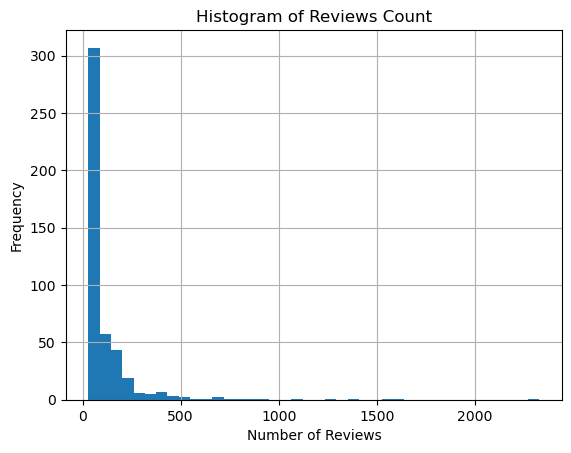

In [863]:
# Plot the histogram
#plt.hist(df_graphs['Game_reviwes_all'], bins=10)
df_copy.reviwes_all_per_day.hist(bins=40)  # Adjust the number of bins as needed

# Set labels and title
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.title('Histogram of Reviews Count')

# Display the histogram
plt.show()

Successful games:  47
Unsuccessful games:  416


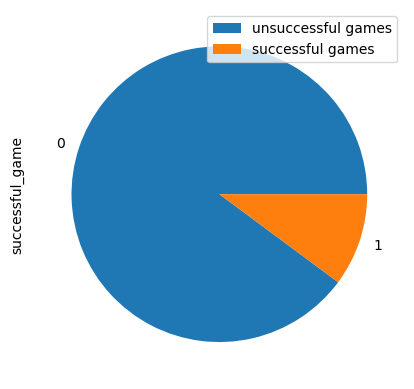

In [864]:
print("Successful games: ",df_copy["successful_game"].value_counts()[1] )
print("Unsuccessful games: ",df_copy["successful_game"].value_counts()[0] )

df_copy["successful_game"].value_counts().plot(kind='pie')
# We can see here the relate between successful game and unsuccessful
labels = ["unsuccessful games", "successful games"]
plt.legend(labels=labels)


Text(0.5, 1.0, "Successful game's amount")

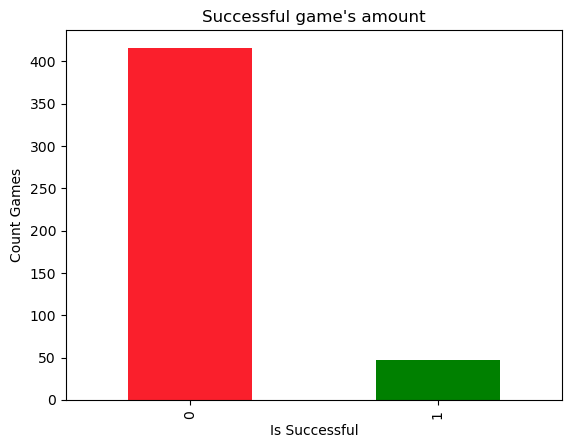

In [865]:
mycolors = ['#FA1F2C', 'green']
df_copy["successful_game"].value_counts().plot(kind='bar' , color = mycolors)
plt.ylabel('Count Games')
plt.xlabel('Is Successful')
plt.title("Successful game's amount")

In [866]:
# Count the occurrences of each language
language_counts = pd.Series([lang for langs in df_copy['Game_languages'] for lang in langs]).value_counts()

# Select the top 10 languages
top_10_languages = language_counts.head(10).index.tolist()

games_count_top_10 = games_count_top_10 = language_counts.loc[top_10_languages]

Text(0.5, 1.0, '10 most frequent languages in games')

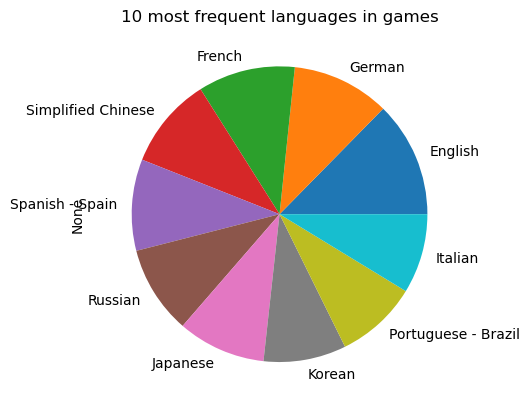

In [867]:
games_count_top_10.plot(kind='pie')
plt.title("10 most frequent languages in games")
# We can see here the relate between successful game and unsuccessful
#labels = ["Unsuccessful games", "Successful games"]
#plt.legend(labels=labels)


Text(0.5, 1.0, '10 most frequent languages in games')

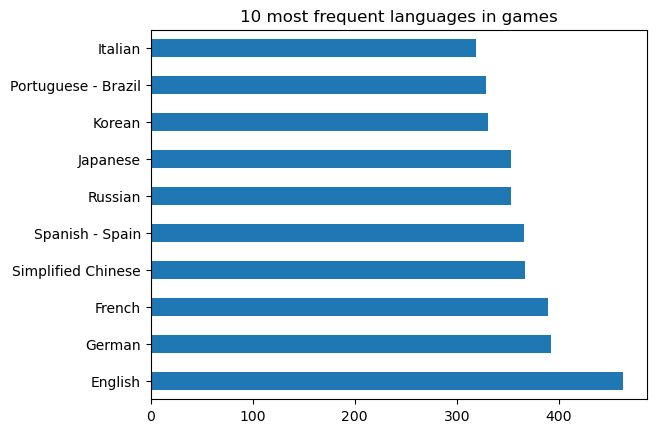

In [868]:
games_count_top_10.plot(kind='barh')
plt.title('10 most frequent languages in games')

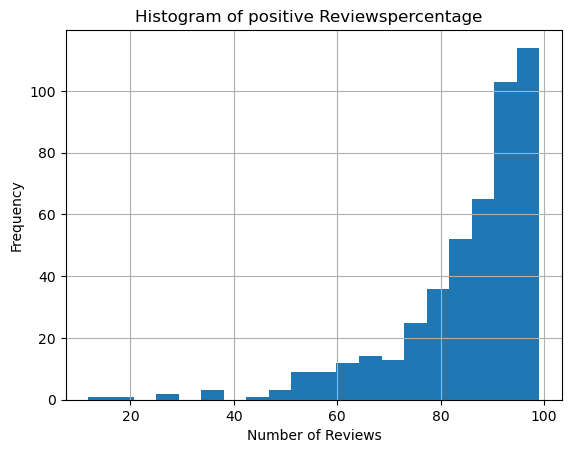

In [869]:
# Plot the histogram
#plt.hist(df_graphs['Game_reviwes_all'], bins=10)
df_copy.Game_reviwes_positive_percentage.hist(bins=20)  # Adjust the number of bins as needed

# Set labels and title
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.title('Histogram of positive Reviewspercentage  ')

# Display the histogram
plt.show()


In [870]:
df_copy.columns

Index(['Game_names', 'Genres_by_site', 'Game_languages', 'Game_reviwes_all',
       'Game_reviwes_positive', 'Game_reviwes_nagitive',
       'Game_achievments_num', 'Game_achievments_grades',
       'Offensive_word_count', 'Num_of_game_languages',
       'Num_of_genres_by_site', 'Game_release_date_cleaned',
       'Game_reviwes_positive_percentage', 'successful_game',
       'days_until_scraping_day', 'reviwes_positive_per_day',
       'reviwes_all_per_day'],
      dtype='object')

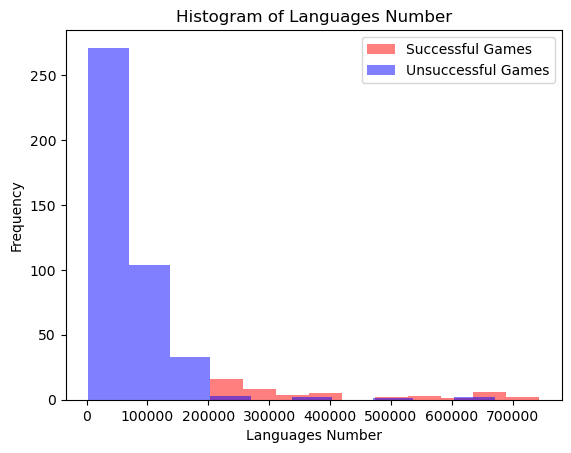

In [871]:
successful_games = df_copy[df_copy['successful_game'] == 1]
unsuccessful_games = df_copy[df_copy['successful_game'] == 0]

# Plot the histograms with different colors
plt.hist(successful_games['Game_reviwes_all'], color='red', alpha=0.5, label='Successful Games')
plt.hist(unsuccessful_games['Game_reviwes_all'], color='blue', alpha=0.5, label='Unsuccessful Games')

# Add labels and title to the plot
plt.xlabel('Languages Number')
plt.ylabel('Frequency')
plt.title('Histogram of Languages Number')

# Add legend
plt.legend()

# Display the plot
plt.show()

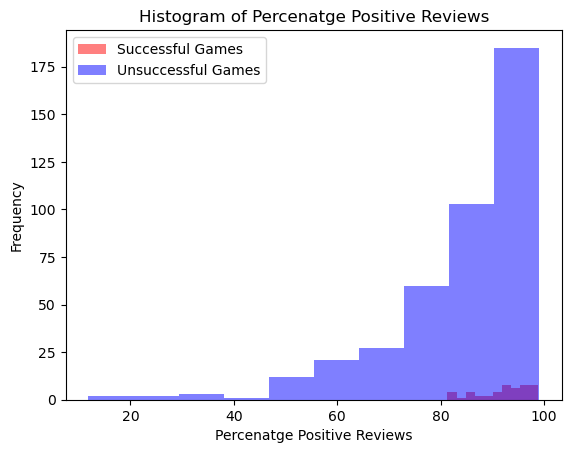

In [872]:
successful_games = df_copy[df_copy['successful_game'] == 1]
unsuccessful_games = df_copy[df_copy['successful_game'] == 0]

# Plot the histograms with different colors
plt.hist(successful_games['Game_reviwes_positive_percentage'], color='red', alpha=0.5, label='Successful Games')
plt.hist(unsuccessful_games['Game_reviwes_positive_percentage'], color='blue', alpha=0.5, label='Unsuccessful Games')

# Add labels and title to the plot
plt.xlabel('Percenatge Positive Reviews')
plt.ylabel('Frequency')
plt.title('Histogram of Percenatge Positive Reviews')

# Add legend
plt.legend()

# Display the plot
plt.show()


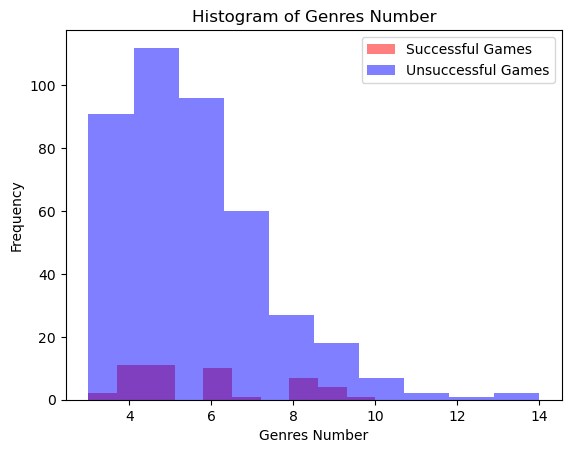

In [873]:
successful_games = df_copy[df_copy['successful_game'] == 1]
unsuccessful_games = df_copy[df_copy['successful_game'] == 0]

# Plot the histograms with different colors
plt.hist(successful_games['Num_of_genres_by_site'], color='red', alpha=0.5, label='Successful Games')
plt.hist(unsuccessful_games['Num_of_genres_by_site'], color='blue', alpha=0.5, label='Unsuccessful Games')

# Add labels and title to the plot
plt.xlabel('Genres Number')
plt.ylabel('Frequency')
plt.title('Histogram of Genres Number')

# Add legend
plt.legend()

# Display the plot
plt.show()


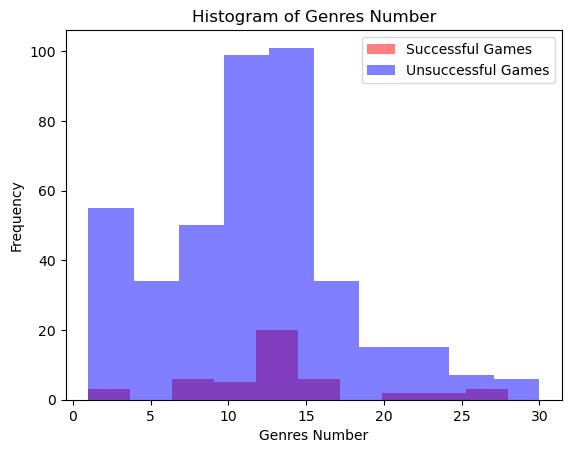

In [874]:
successful_games = df_copy[df_copy['successful_game'] == 1]
unsuccessful_games = df_copy[df_copy['successful_game'] == 0]

# Plot the histograms with different colors
plt.hist(successful_games['Num_of_game_languages'], color='red', alpha=0.5, label='Successful Games')
plt.hist(unsuccessful_games['Num_of_game_languages'], color='blue', alpha=0.5, label='Unsuccessful Games')

# Add labels and title to the plot
plt.xlabel('Genres Number')
plt.ylabel('Frequency')
plt.title('Histogram of Genres Number')

# Add legend
plt.legend()

# Display the plot
plt.show()


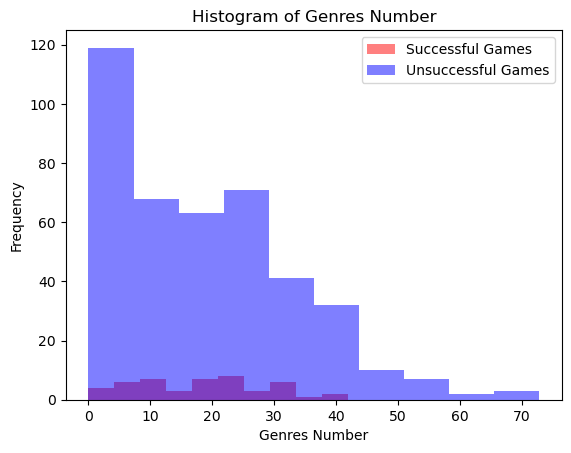

In [875]:
successful_games = df_copy[df_copy['successful_game'] == 1]
unsuccessful_games = df_copy[df_copy['successful_game'] == 0]

# Plot the histograms with different colors
plt.hist(successful_games['Game_achievments_grades'], color='red', alpha=0.5, label='Successful Games')
plt.hist(unsuccessful_games['Game_achievments_grades'], color='blue', alpha=0.5, label='Unsuccessful Games')

# Add labels and title to the plot
plt.xlabel('Genres Number')
plt.ylabel('Frequency')
plt.title('Histogram of Genres Number')

# Add legend
plt.legend()

# Display the plot
plt.show()


In [876]:
df_copy.columns

Index(['Game_names', 'Genres_by_site', 'Game_languages', 'Game_reviwes_all',
       'Game_reviwes_positive', 'Game_reviwes_nagitive',
       'Game_achievments_num', 'Game_achievments_grades',
       'Offensive_word_count', 'Num_of_game_languages',
       'Num_of_genres_by_site', 'Game_release_date_cleaned',
       'Game_reviwes_positive_percentage', 'successful_game',
       'days_until_scraping_day', 'reviwes_positive_per_day',
       'reviwes_all_per_day'],
      dtype='object')

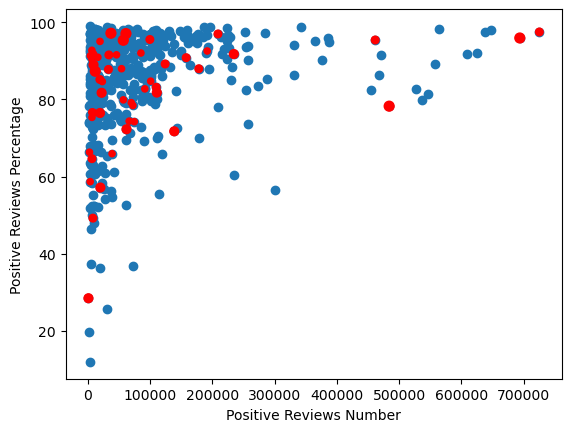

In [877]:
# C

fig = plt.figure()
ax = plt.axes()
ax.scatter(df_copy.Game_reviwes_positive, df_copy.Game_reviwes_positive_percentage)

plt.xlabel('Positive Reviews Number')
plt.ylabel('Positive Reviews Percentage')
ax.scatter( df_copy.Game_reviwes_positive[df_copy.Offensive_word_count>1], df_copy.Game_reviwes_positive_percentage[df_copy.Offensive_word_count>1], c ='red',
          s=df_copy['Offensive_word_count'][df_copy['Offensive_word_count'] > 1] * 10)

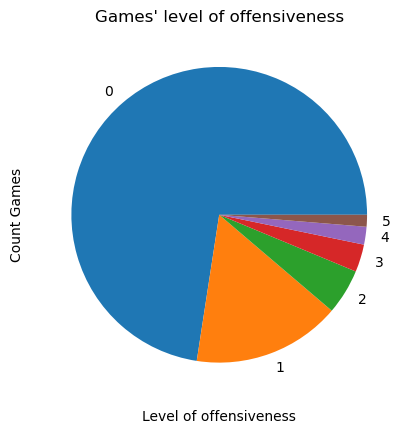

In [878]:
# Create the bar plot
df_copy["Offensive_word_count"].value_counts().plot(kind='pie')

# Set labels and title
plt.ylabel('Count Games')
plt.xlabel('Level of offensiveness')
plt.title("Games' level of offensiveness")

# Display the bar plot
plt.show()


C:\Users\Lior\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Game_reviwes_all'>

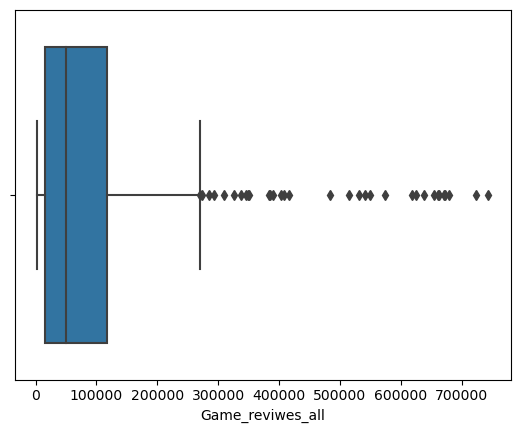

In [879]:
sns.boxplot(df_copy['Game_reviwes_all'])

In [880]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, MaxAbsScaler, PowerTransformer

#Columns to be scaled
cols_to_scale = ['Game_reviwes_all', 'Game_reviwes_positive','Game_reviwes_nagitive','Game_achievments_num',
                 'Game_achievments_grades','reviwes_all_per_day','reviwes_positive_per_day','Game_reviwes_positive_percentage',
                 'Num_of_game_languages','Num_of_genres_by_site','Offensive_word_count']

robust_scaler = RobustScaler()
df_copy[cols_to_scale] = robust_scaler.fit_transform(df_copy[cols_to_scale])

# MACHINE LEARNING

Imports for the ML

In [881]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import ast
import re
import seaborn as sns
from bs4 import BeautifulSoup
from datetime import datetime, date
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [882]:
df_copy.columns

Index(['Game_names', 'Genres_by_site', 'Game_languages', 'Game_reviwes_all',
       'Game_reviwes_positive', 'Game_reviwes_nagitive',
       'Game_achievments_num', 'Game_achievments_grades',
       'Offensive_word_count', 'Num_of_game_languages',
       'Num_of_genres_by_site', 'Game_release_date_cleaned',
       'Game_reviwes_positive_percentage', 'successful_game',
       'days_until_scraping_day', 'reviwes_positive_per_day',
       'reviwes_all_per_day'],
      dtype='object')

In [883]:
columns_to_drop = ['Game_languages' ,'Game_release_date_cleaned', 'Genres_by_site']
df_copy.drop(columns_to_drop, axis=1, inplace=True)

In [884]:
#Already removed
#["Genres_by_site","Game_developer", "Game_tags", "Game_languages", "Game_content_description", "Game__release_date"]

df_ml2 = df_copy.copy()
df_ml3 = df_copy.copy()
df_ml4 = df_copy.copy()
df_ml5 = df_copy.copy()
df_ml6 = df_copy.copy()
#df_ml2['successful_game'].describe()
#df_ml2.drop('Game__release_date_cleaned', axis=1, inplace=True)

# Create a scaler object
scaler = MinMaxScaler()

# Reshape the column for scaling
column_to_scale = df_ml2['days_until_scraping_day'].values.reshape(-1, 1)

# Scale the selected column
df_ml2['days_until_scraping_day'] = scaler.fit_transform(column_to_scale)


In [885]:
df_ml2.columns

Index(['Game_names', 'Game_reviwes_all', 'Game_reviwes_positive',
       'Game_reviwes_nagitive', 'Game_achievments_num',
       'Game_achievments_grades', 'Offensive_word_count',
       'Num_of_game_languages', 'Num_of_genres_by_site',
       'Game_reviwes_positive_percentage', 'successful_game',
       'days_until_scraping_day', 'reviwes_positive_per_day',
       'reviwes_all_per_day'],
      dtype='object')

In [886]:
df_copy.shape

(463, 14)

In [887]:
df_ml2 = df_copy.copy()
# Drop the columns and assign the result to X
columns_to_drop = ['Game_names' , 'Game_reviwes_all', 'Game_reviwes_positive',
                   'Game_reviwes_nagitive', 'reviwes_all_per_day', 'reviwes_positive_per_day', 'successful_game',
                   'Game_reviwes_positive_percentage', 'Game_achievments_grades']

target_column = 'successful_game'
y = df_ml2[target_column]

df_ml2.drop(columns_to_drop, axis=1, inplace=True)
X = df_ml2


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier with 100 trees
rf_classifier = RandomForestClassifier(n_estimators=100)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)


Random Forest Accuracy: 0.8279569892473119


In [888]:
df_ml3 = df_copy.copy()
# Drop the columns and assign the result to X
columns_to_drop = ['Game_names', 'Game_reviwes_all', 'Game_reviwes_positive', 'Game_reviwes_nagitive',
                   'reviwes_all_per_day', 'reviwes_positive_per_day', 'successful_game', 'Game_achievments_grades']
target_column = 'successful_game'



y = df_ml3[target_column]

df_ml3.drop(columns_to_drop, axis=1, inplace=True)
X = df_ml3

X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_classifier = GradientBoostingClassifier()

# Train the classifier on the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy2 = accuracy_score(y_test, y_pred)
print("Guardian Boosting Accuracy:", accuracy2)


Guardian Boosting Accuracy: 0.9


In [889]:
df_ml4 = df_copy.copy()
# Drop the columns and assign the result to X
columns_to_drop = ['Game_names', 'Game_reviwes_all', 'Game_reviwes_positive', 'Game_reviwes_nagitive',
                   'reviwes_all_per_day', 'reviwes_positive_per_day', 'successful_game',
                   'days_until_scraping_day']

target_column = 'reviwes_positive_per_day'

y = df_ml4[target_column]

df_ml4.drop(columns_to_drop, axis=1, inplace=True)
X = df_ml4


# Load the Diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting regressor
gb_regressor = GradientBoostingRegressor()

# Train the model on the training data
gb_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_regressor.predict(X_test)


# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

# Print the R2 score
print("Guardian Boosting R2 score:", r2)
print()
# Calculate the root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Round RMSE to two decimal places

print(y_pred)

Guardian Boosting R2 score: 0.44890724345942035

Root Mean Squared Error: 54.03492436989531
[161.28890402 191.88852889 165.67045702 282.21696222 126.49996592
 134.88300076 256.88224286 222.7045274  165.78383004 155.64221091
  99.00733449 191.74171606  97.58573764 225.401141   115.1540594
 133.35092035 235.84498939 252.91414377 164.09983535 231.43143199
 192.35140539  95.62484163  67.54198254 202.2972312  159.53403047
 183.7925768  195.3200868  179.47572829  71.15936531 108.37068485
 170.07419058 128.78259432 147.42247059 188.10588472 147.57750783
 193.22024796 116.39189263 118.66001789 184.57829795  67.167402
  63.06461029  81.27471725 172.59588967 198.64947627 171.1680638
  79.77418456 114.0814497  116.85106502  83.27173248 170.25102398
 127.80184977  79.17912235 148.04542475 102.73086241 195.19948233
 147.5767223  102.43547652 237.35568497  94.67990241  86.56337633
 177.9989703  183.73615687 139.67408135  80.16675784 126.29770288
 213.56793654 168.93762342 183.8378404  150.8176092   

In [890]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df_ml5 = df_copy.copy()

# Drop the columns and assign the result to X
columns_to_drop = ['Game_names', 'Game_reviwes_all', 'Game_reviwes_positive', 'Game_reviwes_nagitive',
                   'reviwes_all_per_day', 'reviwes_positive_per_day', 'successful_game',
                   'days_until_scraping_day']

target_column = 'reviwes_positive_per_day'

y = df_ml5[target_column]

df_ml5.drop(columns_to_drop, axis=1, inplace=True)
X = df_ml5

# Load your dataset and split it into features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
linear_regression = LinearRegression()

# Train the model on the training data
linear_regression.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_regression.predict(X_test)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)



# Print the R2 score
print("Linear Regression R2 score:", r2)

print()
# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Linear Regression R2 score: 0.012288409191498872

Mean Squared Error: 11.981183841943917


In [891]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df_ml6 = df_copy.copy()

# Drop the columns and assign the result to X
columns_to_drop = ['Game_names' , 'Game_reviwes_all', 'Game_reviwes_positive',
                   'Game_reviwes_nagitive', 'reviwes_all_per_day', 'reviwes_positive_per_day', 'successful_game',
                   'Game_reviwes_positive_percentage', 'Game_achievments_grades']

target_column = 'successful_game'

y = df_ml6[target_column]

df_ml6.drop(columns_to_drop, axis=1, inplace=True)
X = df_ml6

# Load your dataset and split it into features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
logistic_regression = LogisticRegression(max_iter = 1000)

# Train the model on the training data
logistic_regression.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_regression.predict(X_test)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Logistic RegressionAccuracy:", accuracy)

Logistic RegressionAccuracy: 0.8602150537634409
